In [13]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import missingno as msno
import openpyxl
import sklearn
import urllib.request
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
#%matplotlib inline
#from utility import utils as u
os.chdir("C:\\src\\")
from utility import utils as u
from utility import utils as u2

#Revisar y eliminar duplicados

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
import lightgbm as lgb
import math
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import sqrt
from sklearn import linear_model
from sklearn.linear_model import Lars

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import OrthogonalMatchingPursuit

from sklearn.linear_model import BayesianRidge

from sklearn.linear_model import ARDRegression

from sklearn.linear_model import PassiveAggressiveRegressor

from sklearn.linear_model import HuberRegressor

from sklearn.tree import DecisionTreeRegressor 

from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GridSearchCV

import joblib 

In [14]:
os.chdir("C:\\src\\data\\raw\\")  # Establecemos el directorio de trabajo
os.getcwd() # Comprobamos que el directorio de trabajo sea el correcto

'C:\\src\\data\\raw'

In [ ]:
data_FIFA

In [15]:
df1=u.cargar_fichero("FIFA18_official_data.csv","01/09/2018")
df2=u.cargar_fichero("FIFA19_official_data.csv","01/09/2019")
df3=u.cargar_fichero("FIFA20_official_data.csv","01/09/2020")
df4=u.cargar_fichero("FIFA21_official_data.csv","01/09/2021")
df5=u.cargar_fichero("FIFA22_official_data.csv","01/09/2022")

In [16]:
data_Fifa=u.concatenar(df1,df2,df3,df4,df5) # definir argumentos
data_Fifa=u.limpiar_df(data_Fifa)
data_Fifa=u.peso(data_Fifa)
data_Fifa=u.altura(data_Fifa)
data_Fifa=u.cambios_nombre(data_Fifa)
data_Fifa=u.ligas_pais_ano(data_Fifa)
data_Fifa =u.modificar_dataframe(data_Fifa)

In [113]:
data_Fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18365 entries, 0 to 86783
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18365 non-null  int64         
 1   Name                      18365 non-null  object        
 2   Age                       18365 non-null  int64         
 3   Photo                     18365 non-null  object        
 4   Nationality               18365 non-null  object        
 5   Overall                   18365 non-null  int64         
 6   Potential                 18365 non-null  int64         
 7   Club                      18365 non-null  object        
 8   Club_Logo                 18365 non-null  object        
 9   Value                     18365 non-null  object        
 10  Wage                      18365 non-null  object        
 11  Special                   18365 non-null  int64         
 12  Preferred_Foot    

**MINI EDA*** 

# Vemos los tipos de variables

In [18]:
data_Fifa.describe()

,ID,Age,Overall,Potential,Special,International_Reputation,Weak_Foot,Skill_Moves,Jersey_Number,Height,...,POS,Best_Overall_Rating,Foot,inc,PAC,SHO,PAS,DRI,DEF,PHY
count,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,...,18365.000000,18365.000000,14515.000000,14515.000000,18365.000000,18338.000000,18338.000000,18155.000000,18338.000000,18338.000000
mean,212949.205227,24.844977,70.806589,76.397386,1693.853471,1.365478,3.018622,2.553607,22.043833,182.031339,...,16.911244,71.099864,168.705698,13.285521,65.502995,50.513306,52.877195,59.765381,49.964838,58.836610
std,38124.112847,4.953661,7.586533,5.628452,291.659091,0.685082,0.677839,0.859635,16.964137,6.584850,...,19.343307,7.441030,15.203217,10.550469,14.359774,21.922847,21.548413,22.527443,23.545442,22.417815
min,2.000000,16.000000,38.000000,55.000000,731.000000,1.000000,1.000000,1.000000,1.000000,160.020000,...,1.000000,42.000000,152.400000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,197031.000000,21.000000,65.000000,72.000000,1528.000000,1.000000,3.000000,2.000000,10.000000,177.800000,...,8.000000,66.000000,152.400000,2.540000,58.000000,40.000000,46.500000,58.166667,34.600000,55.750000
50%,220659.000000,24.000000,72.000000,76.000000,1736.000000,1.000000,3.000000,3.000000,19.000000,182.880000,...,11.000000,72.000000,182.880000,10.160000,68.000000,56.000000,57.833333,66.333333,56.800000,65.250000
75%,239015.000000,28.000000,76.000000,80.000000,1911.000000,2.000000,3.000000,3.000000,30.000000,187.000000,...,14.000000,76.000000,182.880000,22.860000,75.500000,66.166667,67.166667,72.500000,69.000000,72.500000
max,264699.000000,43.000000,94.000000,95.000000,2349.000000,5.000000,5.000000,5.000000,99.000000,203.200000,...,93.000000,94.000000,182.880000,27.940000,97.000000,91.833333,92.166667,95.333333,90.400000,89.750000


# Verificamos si existen nulos y eliminamos estos

In [19]:
data_Fifa.describe(include='all')

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Club_Logo,Value,...,Year,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY
count,18365.000000,18365,18365.000000,18365,18365,18365.000000,18365.000000,18365,18365,18365,...,18365,14515.000000,14515.000000,18365,18365.000000,18338.000000,18338.000000,18155.000000,18338.000000,18338.000000
unique,NaN,10484,NaN,15002,134,NaN,NaN,114,234,270,...,5,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Danilo,NaN,https://cdn.sofifa.com/players/201/990/18_60.png,Spain,NaN,NaN,Paris S-G,https://cdn.sofifa.com/teams/11/light_30.png,5.5,...,2021-01-09 00:00:00,NaN,NaN,ENG,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,NaN,4,3247,NaN,NaN,320,170,409,...,3999,NaN,NaN,4703,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,212949.205227,NaN,24.844977,NaN,NaN,70.806589,76.397386,NaN,NaN,NaN,...,NaN,168.705698,13.285521,NaN,65.502995,50.513306,52.877195,59.765381,49.964838,58.836610
std,38124.112847,NaN,4.953661,NaN,NaN,7.586533,5.628452,NaN,NaN,NaN,...,NaN,15.203217,10.550469,NaN,14.359774,21.922847,21.548413,22.527443,23.545442,22.417815
min,2.000000,NaN,16.000000,NaN,NaN,38.000000,55.000000,NaN,NaN,NaN,...,NaN,152.400000,0.000000,NaN,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,197031.000000,NaN,21.000000,NaN,NaN,65.000000,72.000000,NaN,NaN,NaN,...,NaN,152.400000,2.540000,NaN,58.000000,40.000000,46.500000,58.166667,34.600000,55.750000


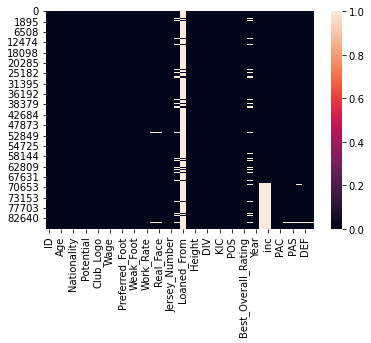

In [20]:
#Analizamos datos vemos las columnas que contienen nulos y adaptamos lo que necesitamos , ver memoria
sns.heatmap(data_Fifa.isnull(),cbar=True);

In [21]:
data_Fifa.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Overall                         0
Potential                       0
Club                            0
Club_Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred_Foot                  0
International_Reputation        0
Weak_Foot                       0
Skill_Moves                     0
Work_Rate                       0
Body_Type                      21
Real_Face                      21
Position                        0
Jersey_Number                   0
Joined                       1564
Loaned_From                 16834
Contract_Valid_Until            2
Height                          0
Weight                          0
DIV                             0
HAN                             0
KIC                             0
REF           

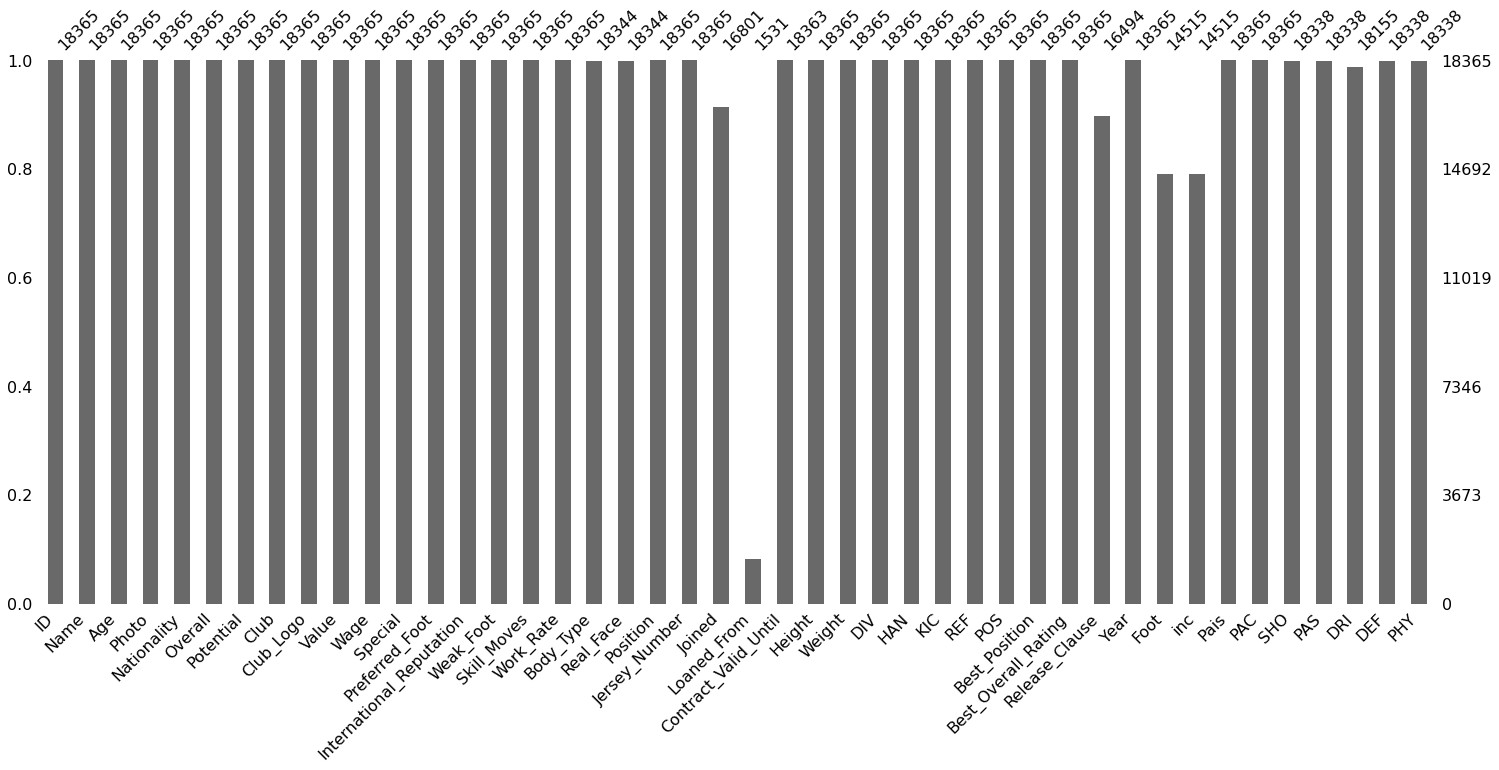

In [22]:
msno.bar(data_Fifa);

## Eliminamos nulos asignando los valores de las medias de cada variable

In [23]:
data_Fifa=data_Fifa.fillna(data_Fifa.mean())

In [24]:
data_Fifa

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Club_Logo,Value,...,Year,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,92,92,Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,97,...,2018-01-09,182.880000,0.000000,ESP,82.5,88.666667,79.666667,86.500000,46.2,82.00
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,42.5,...,2018-01-09,152.400000,22.860000,ITA,78.0,78.666667,75.833333,83.500000,79.4,83.50
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,21,...,2018-01-09,152.400000,20.320000,ITA,85.0,80.833333,77.000000,82.166667,75.6,77.75
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,85,87,Bayern Munich,https://cdn.sofifa.com/teams/21/light_30.png,38.5,...,2018-01-09,152.400000,27.940000,GER,83.5,75.666667,80.666667,80.166667,79.8,76.75
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,88,92,Manchester Utd,https://cdn.sofifa.com/teams/11/light_30.png,76,...,2018-01-09,182.880000,7.620000,ENG,76.5,81.500000,84.833333,81.000000,69.4,86.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86761,245542,G. Figliuzzi,20,https://cdn.sofifa.com/players/245/542/22_60.png,Italy,49,64,Crotone,https://cdn.sofifa.com/teams/110734/30.png,100,...,2022-01-09,168.705698,13.285521,ITA,21.0,0.000000,0.000000,0.000000,0.0,0.00
86764,260154,G. Bellagambi,19,https://cdn.sofifa.com/players/260/154/22_60.png,England,54,73,Huddersfield,https://cdn.sofifa.com/teams/1939/30.png,250,...,2022-01-09,168.705698,13.285521,ENG,23.0,0.000000,0.000000,0.000000,0.0,0.00
86772,264460,P. Zovko,19,https://cdn.sofifa.com/players/264/460/22_60.png,Bosnia and Herzegovina,58,73,Spezia,https://cdn.sofifa.com/teams/110741/30.png,425,...,2022-01-09,168.705698,13.285521,ITA,20.0,0.000000,0.000000,0.000000,0.0,0.00
86773,259973,P. Boer,19,https://cdn.sofifa.com/players/259/973/22_60.png,Italy,54,74,Roma,https://cdn.sofifa.com/teams/52/30.png,275,...,2022-01-09,168.705698,13.285521,ITA,28.5,0.000000,0.000000,0.000000,0.0,0.00


# Miramos la correlación 

In [25]:
# Show 44 features with most correlation ratio - Pearson
corr = data_Fifa.corr(method='pearson')
print (corr['Overall'].sort_values(ascending=False)[:25], '\n')


Overall                     1.000000
Best_Overall_Rating         0.987122
Potential                   0.638610
Special                     0.621388
International_Reputation    0.616378
Age                         0.556414
PAS                         0.361750
SHO                         0.328361
Skill_Moves                 0.318247
DRI                         0.292978
PHY                         0.277398
DEF                         0.273396
Weak_Foot                   0.240959
PAC                         0.225373
Weight                      0.179322
Foot                        0.045355
Height                      0.040265
REF                         0.007228
POS                         0.002364
KIC                         0.001614
HAN                         0.001028
DIV                        -0.000558
inc                        -0.039752
Jersey_Number              -0.422851
ID                         -0.457148
Name: Overall, dtype: float64 



In [26]:
print (corr['Overall'].sort_values(ascending=False)[-20:])

Age              0.556414
PAS              0.361750
SHO              0.328361
Skill_Moves      0.318247
DRI              0.292978
PHY              0.277398
DEF              0.273396
Weak_Foot        0.240959
PAC              0.225373
Weight           0.179322
Foot             0.045355
Height           0.040265
REF              0.007228
POS              0.002364
KIC              0.001614
HAN              0.001028
DIV             -0.000558
inc             -0.039752
Jersey_Number   -0.422851
ID              -0.457148
Name: Overall, dtype: float64


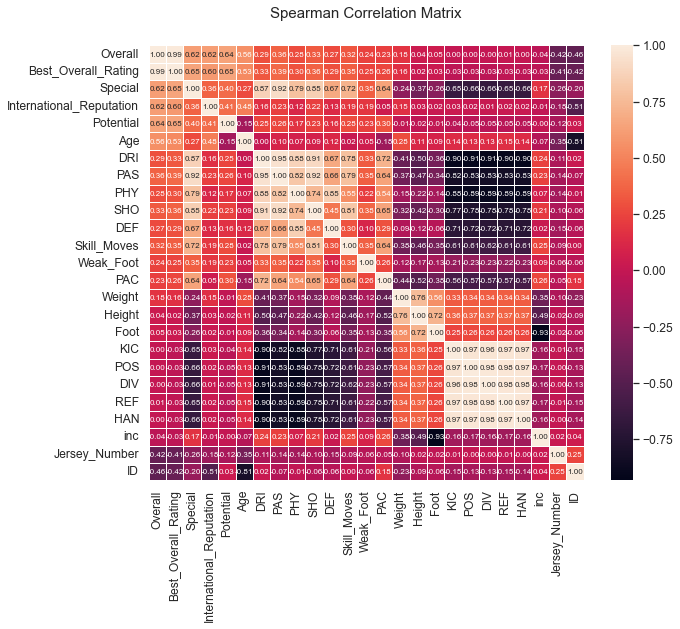

In [27]:
# Sales correlation matrix
k = 44 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat = data_Fifa.corr(method='spearman')
# picking the top 50 correlated features
cols15 = corrmat.nlargest(k, 'Overall')['Overall'].index
cm = np.corrcoef(data_Fifa[cols15].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols15.values, 
                 xticklabels=cols15.values, linewidths=.5).set_title("Spearman Correlation Matrix", y=1.05, size=15)
plt.show()

# Separamos modelos para ver si mejoran los valores de la correlacion

In [28]:
data_Fifa_FOT=data_Fifa[(data_Fifa['Best_Position'] != "GK")]

In [29]:
data_Fifa_GK=data_Fifa[(data_Fifa['Best_Position'] == "GK")]

In [30]:
# Eliminamos las variables de los modelos  que no son dependientes del tipo de jugador
data_Fifa_FOT=data_Fifa_FOT.drop(["DIV","HAN","KIC","REF","POS"], axis =1)

In [31]:
# Eliminamos las variables de los modelos  que no son dependientes del tipo de jugador
data_Fifa_GK=data_Fifa_GK.drop(["PAS","SHO","PHY","DRI","DEF"], axis =1)

# Verificamos de nuevo la correlacion con los dos modelos separados, jugadores de campo y porteros

In [32]:
# Show 44 features with most correlation ratio - Pearson
corr = data_Fifa_FOT.corr(method='pearson')
print (corr['Overall'].sort_values(ascending=False)[:44], '\n')


Overall                     1.000000
Best_Overall_Rating         0.985998
Special                     0.819645
DRI                         0.698169
PAS                         0.650524
Potential                   0.622931
International_Reputation    0.616200
PHY                         0.599150
Age                         0.564794
SHO                         0.510901
Skill_Moves                 0.391886
DEF                         0.370130
Weak_Foot                   0.244319
PAC                         0.197140
Weight                      0.195773
Foot                        0.067007
Height                      0.059349
inc                        -0.059652
Jersey_Number              -0.428157
ID                         -0.472086
Name: Overall, dtype: float64 



In [33]:
data_Fifa_FOT.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Overall', 'Potential',
       'Club', 'Club_Logo', 'Value', 'Wage', 'Special', 'Preferred_Foot',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate',
       'Body_Type', 'Real_Face', 'Position', 'Jersey_Number', 'Joined',
       'Loaned_From', 'Contract_Valid_Until', 'Height', 'Weight',
       'Best_Position', 'Best_Overall_Rating', 'Release_Clause', 'Year',
       'Foot', 'inc', 'Pais', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [34]:
print (corr['Overall'].sort_values(ascending=False)[-6:])

Weight           0.195773
Foot             0.067007
Height           0.059349
inc             -0.059652
Jersey_Number   -0.428157
ID              -0.472086
Name: Overall, dtype: float64


In [35]:
# Show 44 features with most correlation ratio - Pearson
corr2 = data_Fifa_GK.corr(method='pearson')
print (corr2['Overall'].sort_values(ascending=False)[:44], '\n')


Overall                     1.000000
Best_Overall_Rating         0.997945
REF                         0.960918
DIV                         0.959533
POS                         0.957540
HAN                         0.952496
Special                     0.853603
KIC                         0.798413
Potential                   0.724096
International_Reputation    0.627528
Age                         0.574857
PAC                         0.568669
Weight                      0.342557
Weak_Foot                   0.168277
Height                      0.150820
inc                         0.047570
Foot                        0.030195
Jersey_Number              -0.388750
ID                         -0.444049
Skill_Moves                      NaN
Name: Overall, dtype: float64 



In [36]:
data_Fifa_FOT=u.borrar(data_Fifa_FOT)

In [37]:
data_Fifa_GK=u.borrar(data_Fifa_GK)

In [38]:
dff=data_Fifa_FOT

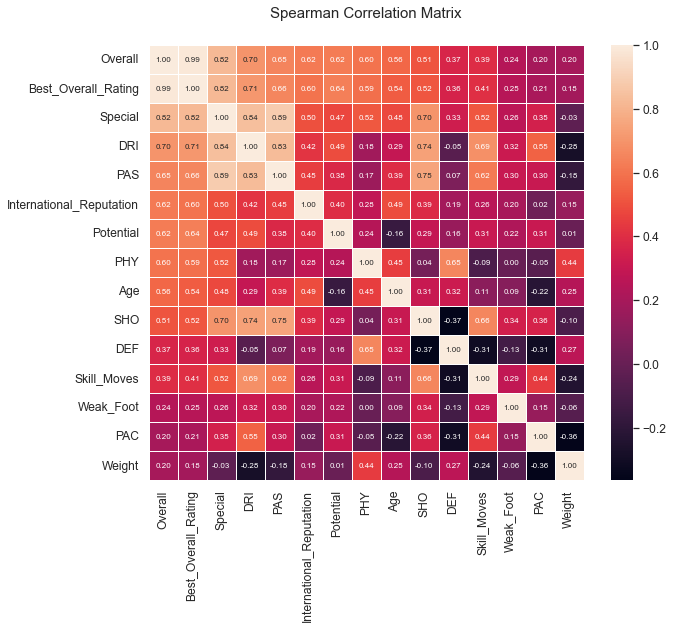

In [39]:
# Sales correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat = data_Fifa_FOT.corr(method='spearman')
# picking the top 50 correlated features
cols15 = corrmat.nlargest(k, 'Overall')['Overall'].index
cm = np.corrcoef(data_Fifa_FOT[cols15].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols15.values, 
                 xticklabels=cols15.values, linewidths=.5).set_title("Spearman Correlation Matrix", y=1.05, size=15)
plt.show()

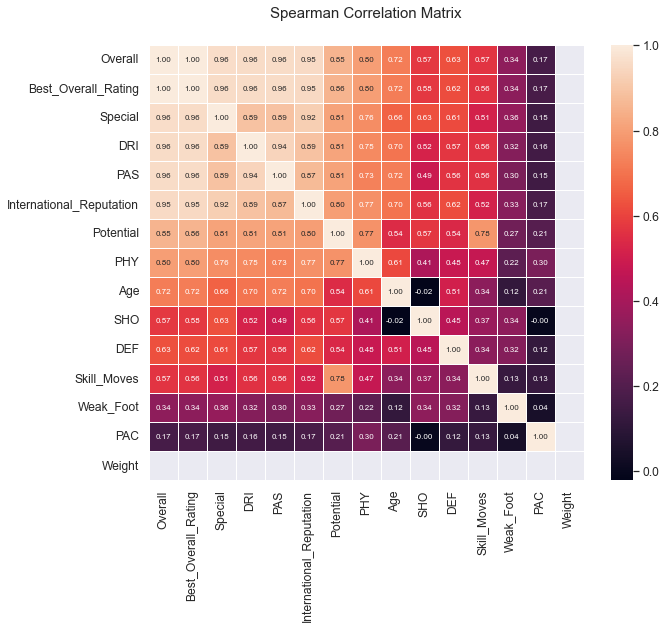

In [40]:
# Sales correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat2 = data_Fifa_GK.corr(method='spearman')
# picking the top 50 correlated features
cols25 = corrmat2.nlargest(k, 'Overall')['Overall'].index
cm = np.corrcoef(data_Fifa_GK[cols25].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols15.values, 
                 xticklabels=cols15.values, linewidths=.5).set_title("Spearman Correlation Matrix", y=1.05, size=15)
plt.show()

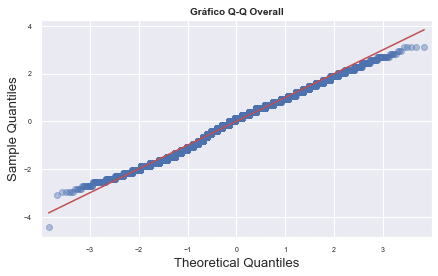

In [41]:
import statsmodels.api as sm
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_Fifa_FOT["Overall"],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Overall', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

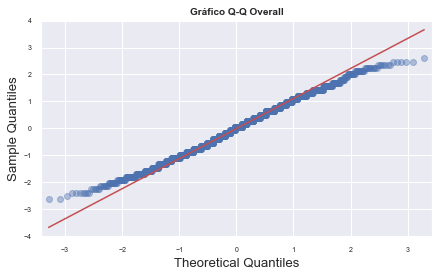

In [42]:
import statsmodels.api as sm
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_Fifa_GK["Overall"],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Overall', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [43]:
#Shapiro Wilk
shapiro_test = stats.shapiro(data_Fifa_FOT.Overall);  # convertirla en normal raiz cuadrado, exponencial logaritmico
shapiro_test

ShapiroResult(statistic=0.9905848503112793, pvalue=3.0050951192472087e-31)

In [44]:
#Shapiro Wilk
shapiro_test = stats.shapiro(data_Fifa_GK.Overall);  # convertirla en normal raiz cuadrado, exponencial logaritmico
shapiro_test

ShapiroResult(statistic=0.9934202432632446, pvalue=9.568863390541082e-08)

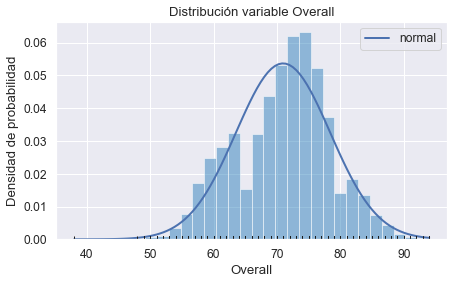

In [45]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_Fifa_FOT["Overall"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_Fifa_FOT["Overall"]), max(data_Fifa_FOT["Overall"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_Fifa_FOT["Overall"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_Fifa_FOT["Overall"], np.full_like(data_Fifa_FOT["Overall"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución variable Overall')
ax.set_xlabel('Overall')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

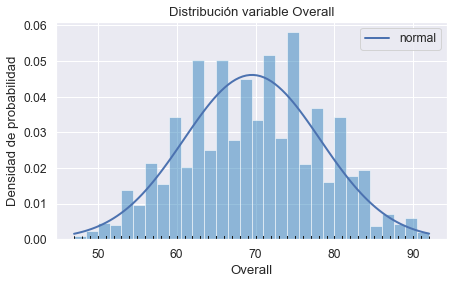

In [46]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_Fifa_GK["Overall"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_Fifa_GK["Overall"]), max(data_Fifa_GK["Overall"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_Fifa_GK["Overall"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_Fifa_GK["Overall"], np.full_like(data_Fifa_GK["Overall"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución variable Overall')
ax.set_xlabel('Overall')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [47]:
#D'Agostino
stat_fil, p_value_fil =stats.normaltest(data_Fifa_FOT.Overall)
stat_fil2, p_value_fil2 =stats.normaltest(data_Fifa_GK.Overall)

In [48]:
p_value_fil, p_value_fil2

(3.614349807916987e-46, 1.0594535659204585e-10)

In [49]:
# Diagramas de cajas 

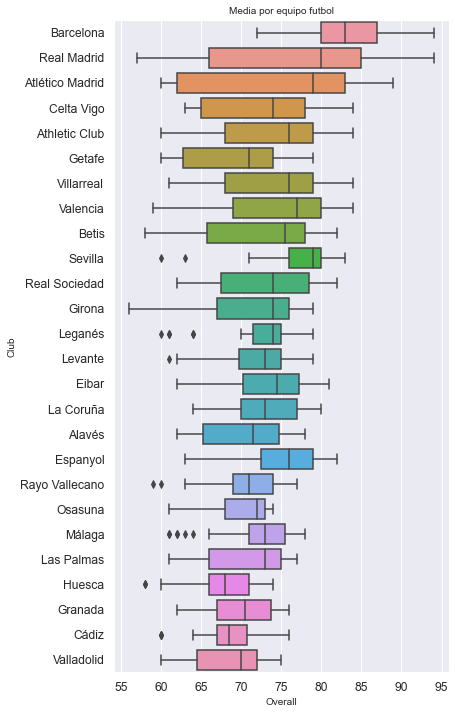

In [50]:
plt.figure(figsize=(6,12),facecolor='w');
plt.title('Media por equipo futbol', fontsize=10)
plt.ylabel('Club', fontsize=10)
plt.xlabel('Overall', fontsize=10)
sns.boxplot(y=data_Fifa.Club[(data_Fifa.Pais=="ESP")&(data_Fifa.Year=="2018-01-09")], x=data_Fifa["Overall"]);

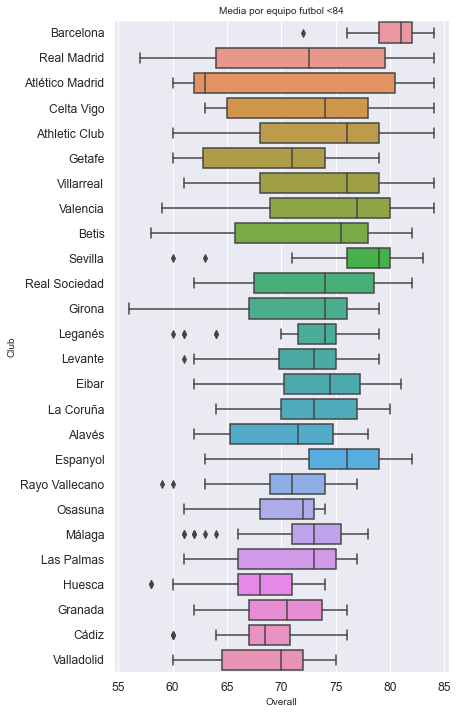

In [51]:
plt.figure(figsize=(6,12),facecolor='w');
plt.title('Media por equipo futbol <84', fontsize=10)
plt.ylabel('Club', fontsize=10)
plt.xlabel('Overall', fontsize=10)
sns.boxplot(y=data_Fifa.Club[(data_Fifa.Pais=="ESP")&(data_Fifa.Year=="2018-01-09")], x=data_Fifa.Overall[data_Fifa.Overall<=84]);  # .loc y ver datos para justificar

*** PREPARACION DE DATOS PARA EL MODELO DE ML ***

## Revisamos el formato de las variables , eliminamos categoricas que no aportan 
## nada y convertimos las variables que nos interesan de objeto a float

In [52]:
data_Fifa_FOT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16380 entries, 0 to 85697
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16380 non-null  int64  
 1   Overall                   16380 non-null  int64  
 2   Potential                 16380 non-null  int64  
 3   Value                     16380 non-null  object 
 4   Wage                      16380 non-null  object 
 5   Special                   16380 non-null  int64  
 6   Preferred_Foot            16380 non-null  object 
 7   International_Reputation  16380 non-null  float64
 8   Weak_Foot                 16380 non-null  float64
 9   Skill_Moves               16380 non-null  float64
 10  Work_Rate                 16380 non-null  object 
 11  Loaned_From               1438 non-null   object 
 12  Weight                    16380 non-null  float64
 13  Best_Position             16380 non-null  object 
 14  Best_O

In [53]:
data_Fifa_FOT["Value"]

0          97
1        42.5
2          21
3        38.5
4          76
         ... 
85448     190
85456     210
85465     350
85539     130
85697     525
Name: Value, Length: 16380, dtype: object

In [54]:
data_Fifa_FOT["Wage"]

0        500
1        130
2         70
3        130
4        250
        ... 
85448      3
85456      4
85465    500
85539      2
85697      8
Name: Wage, Length: 16380, dtype: object

In [55]:
data_Fifa_FOT["Work_Rate"]

0          High/ Medium
1            High/ High
2          High/ Medium
3          High/ Medium
4             High/ Low
              ...      
85448    Medium/ Medium
85456    Medium/ Medium
85465    Medium/ Medium
85539    Medium/ Medium
85697      Medium/ High
Name: Work_Rate, Length: 16380, dtype: object

In [56]:
data_Fifa_FOT["Best_Position"]

0         CF
1        CDM
2         CF
3         LB
4         CM
        ... 
85448     CB
85456     CB
85465     CB
85539     CB
85697     CB
Name: Best_Position, Length: 16380, dtype: object

In [57]:
data_Fifa_FOT=data_Fifa_FOT.drop(["Value","Wage","Best_Position","Work_Rate","Loaned_From"], axis =1)

In [58]:
data_Fifa_GK=data_Fifa_GK.drop(["Value","Wage","Best_Position","Work_Rate","Loaned_From"], axis =1)

# categorizamos las variables objetos

In [59]:
# We convert Categorical to boolean for first dataset  (Prefered foot)
categorical_feature = (data_Fifa_FOT.drop(columns='Overall').dtypes == "object")

# filter categorical columns
categorical_cols = data_Fifa_FOT.drop(columns='Overall').columns[categorical_feature].tolist()

# Binarize categorical values
data_Fifa_FOT = pd.get_dummies(data_Fifa_FOT, columns=categorical_cols,
prefix=categorical_cols, drop_first=True )

In [60]:
# We convert Categorical to boolean for first dataset
categorical_feature = (data_Fifa_GK.drop(columns='Overall').dtypes == "object")

# filter categorical columns
categorical_cols = data_Fifa_GK.drop(columns='Overall').columns[categorical_feature].tolist()

# Binarize categorical values
data_Fifa_GK = pd.get_dummies(data_Fifa_GK, columns=categorical_cols,
prefix=categorical_cols, drop_first=True )

# normalizamos las variables numericas para que esten todas a escala, exceptuando overall

In [61]:
# Min-Max Normalization (Min-max escaler)
data_Fifa2_1 = data_Fifa_FOT.drop('Overall', axis=1)
data_Fifa2_norm = (data_Fifa2_1-data_Fifa2_1.min())/(data_Fifa2_1.max()-data_Fifa2_1.min())
data_Fifa2_norm = pd.concat((data_Fifa2_norm, data_Fifa_FOT.Overall), 1)


data_Fifa2_norm["Overall"]=data_Fifa_FOT["Overall"]

data_Fifa_FOT=data_Fifa2_norm

In [62]:
# Min-Max Normalization
data_Fifa2_1 = data_Fifa_GK.drop('Overall', axis=1)
data_Fifa2_norm = (data_Fifa2_1-data_Fifa2_1.min())/(data_Fifa2_1.max()-data_Fifa2_1.min())
data_Fifa2_norm = pd.concat((data_Fifa2_norm, data_Fifa_GK.Overall), 1)


data_Fifa2_norm["Overall"]=data_Fifa_GK["Overall"]

data_Fdata_Fifa_GK=data_Fifa2_norm

In [63]:
data_Fifa_FOT=data_Fifa_FOT.fillna(data_Fifa_FOT.mean())

In [64]:
data_Fifa_GK=data_Fifa_GK.fillna(data_Fifa_GK.mean())

In [65]:
data_Fifa_FOT.columns

Index(['Age', 'Potential', 'Special', 'International_Reputation', 'Weak_Foot',
       'Skill_Moves', 'Weight', 'Best_Overall_Rating', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Preferred_Foot_Right', 'Overall'],
      dtype='object')

In [66]:
data_Fifa_GK.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'International_Reputation',
       'Weak_Foot', 'Skill_Moves', 'Weight', 'DIV', 'HAN', 'KIC', 'REF', 'POS',
       'Best_Overall_Rating', 'PAC', 'Preferred_Foot_Right'],
      dtype='object')

# Salvamos los ficheros antes de entrenar

In [67]:
os.chdir("C:\\src\\model\\")  # Establecemos el directorio de trabajo
os.getcwd() # Comprobamos que el directorio de trabajo sea el correcto

'C:\\src\\model'

In [68]:
data_Fifa_FOT.to_csv("my_model_FOT.csv", sep=',', encoding="utf-8", index=False)

In [69]:
data_Fifa_GK.to_csv("my_model_GK.csv", sep=',', encoding="utf-8", index=False)

*** ENTRENAMIENTO DEL MODELO *** 

In [70]:
train=data_Fifa_FOT
#train=data_Fifa_GK

In [71]:
X = train.drop(['Overall'], axis=1)
y = train['Overall'].copy()
X.shape

(16380, 15)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [73]:
X_train=X_train.reset_index(drop=True)   # hacer el resto para reorganizar indices 

In [74]:
X_train

,Age,Potential,Special,International_Reputation,Weak_Foot,Skill_Moves,Weight,Best_Overall_Rating,PAC,SHO,PAS,DRI,DEF,PHY,Preferred_Foot_Right
0,0.076923,0.800,0.505148,0.00,0.50,0.75,0.291902,0.461538,0.678322,0.561028,0.543269,0.634349,0.210811,0.284519,1.0
1,0.346154,0.500,0.706932,0.00,0.50,0.50,0.707902,0.576923,0.496503,0.571734,0.701923,0.578947,0.686486,0.682008,1.0
2,0.230769,0.575,0.612217,0.00,0.25,0.25,0.353951,0.538462,0.552448,0.443255,0.466346,0.545706,0.686486,0.702929,1.0
3,0.576923,0.475,0.763212,0.00,0.50,0.50,0.486634,0.596154,0.601399,0.640257,0.694712,0.612188,0.762162,0.652720,0.0
4,0.192308,0.650,0.629375,0.00,0.50,0.75,0.158049,0.596154,0.517483,0.543897,0.701923,0.662050,0.521622,0.376569,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,0.269231,0.650,0.764585,0.00,0.50,0.75,0.528780,0.634615,0.776224,0.668094,0.615385,0.659280,0.672973,0.778243,1.0
13100,0.000000,0.575,0.466026,0.00,0.75,0.50,0.371707,0.442308,0.636364,0.603854,0.430288,0.498615,0.172973,0.443515,0.0
13101,0.269231,0.650,0.693205,0.00,0.75,0.50,0.725659,0.634615,0.755245,0.764454,0.668269,0.598338,0.316216,0.707113,1.0
13102,0.076923,0.550,0.454358,0.00,0.50,0.25,0.509268,0.403846,0.699301,0.567452,0.487981,0.465374,0.210811,0.305439,1.0


*** MODELOS REGRESION LINEAL *** 

*** METRICAS DE CADA MODELO MAE MSE MSQE**


# Modelos sin parametros, con valores por defecto, sacamos df con valores :
# Modelo MAE MSE RMSE

**Linear Reggression**

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)

MAE_lr=mean_absolute_error(y_test, lr.predict(X_test))
MSE_lr=mean_squared_error(y_test, lr.predict(X_test))
RMSE_lr=np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

MAE test 0.8994097652908206
MSE test 1.2502368868750637
RMSE test 1.1181399227623812


Lasso Regression

In [76]:
#lasso = Lasso(alpha=6000)
lasso = Lasso()
lasso.fit(X_train, y_train)

MAE_lasso=mean_absolute_error(y_test, lasso.predict(X_test))
MSE_lasso=mean_squared_error(y_test, lasso.predict(X_test))
RMSE_lasso=np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lasso.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lasso.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

MAE test 6.095978047695931
MSE test 56.03121720070802
RMSE test 7.485400269905947


Ridge Regression

In [77]:
ridge = Ridge()
ridge.fit(X_train, y_train)

MAE_ridge=mean_absolute_error(y_test, ridge.predict(X_test))
MSE_ridge=mean_squared_error(y_test, ridge.predict(X_test))
RMSE_ridge=np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ridge.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ridge.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

MAE test 0.8999992243650884
MSE test 1.2533056955843498
RMSE test 1.119511364651717


Elastic net

In [78]:
elastic = ElasticNet()
elastic.fit(X_train, y_train)

MAE_elastic=mean_absolute_error(y_test, elastic.predict(X_test))
MSE_elastic=mean_squared_error(y_test, elastic.predict(X_test))
RMSE_elastic=np.sqrt(mean_squared_error(y_test, elastic.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, elastic.predict(X_test)))
print('MSE test', mean_squared_error(y_test, elastic.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, elastic.predict(X_test))))

MAE test 5.7868576775459
MSE test 50.4282446297749
RMSE test 7.101284716850529


*** LARS

In [79]:
lars= Lars()
lars.fit(X_train, y_train)

MAE_lars=mean_absolute_error(y_test, lars.predict(X_test))
MSE_lars=mean_squared_error(y_test, lars.predict(X_test))
RMSE_lars=np.sqrt(mean_squared_error(y_test, lars.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lars.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lars.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lars.predict(X_test))))

MAE test 0.919424902007532
MSE test 1.4490700726978307
RMSE test 1.2037732646548647


RandomForest

In [80]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

MAE_rf=mean_absolute_error(y_test, rf.predict(X_test))
MSE_rf=mean_squared_error(y_test, rf.predict(X_test))
RMSE_rf=np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, rf.predict(X_test)))
print('MSE test', mean_squared_error(y_test, rf.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))

MAE test 0.6025946275946277
MSE test 0.8069766788766786
RMSE test 0.8983188069258478


Naive Bayes

In [81]:
gnb = GaussianNB()
gnb.fit(X_train, y_train).predict(X_test)

MAE_gnb=mean_absolute_error(y_test, gnb.predict(X_test))
MSE_gnb=mean_squared_error(y_test, gnb.predict(X_test))
RMSE_gnb=np.sqrt(mean_squared_error(y_test, gnb.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, gnb.predict(X_test)))
print('MSE test', mean_squared_error(y_test, gnb.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, gnb.predict(X_test))))

MAE test 1.2802197802197801
MSE test 3.222832722832723
RMSE test 1.7952249783335577


Llar

In [82]:
lassolars = linear_model.LassoLars()
lassolars.fit(X_train, y_train).predict(X_test)

MAE_lassolars=mean_absolute_error(y_test, lassolars.predict(X_test))
MSE_lassolars=mean_squared_error(y_test, lassolars.predict(X_test))
RMSE_lassolars=np.sqrt(mean_squared_error(y_test, lassolars.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lassolars.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lassolars.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lassolars.predict(X_test))))

MAE test 6.166570134518853
MSE test 57.33619326127339
RMSE test 7.572066644006337


Omp

In [83]:
omp = OrthogonalMatchingPursuit()
omp.fit(X_train, y_train).predict(X_test)

MAE_omp=mean_absolute_error(y_test, omp.predict(X_test))
MSE_omp=mean_squared_error(y_test, omp.predict(X_test))
RMSE_omp=np.sqrt(mean_squared_error(y_test, omp.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, omp.predict(X_test)))
print('MSE test', mean_squared_error(y_test, omp.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, omp.predict(X_test))))

MAE test 1.0244810940498665
MSE test 1.527037834714379
RMSE test 1.235733723224538


Bayesian ridge

In [84]:
br = BayesianRidge()
br.fit(X_train, y_train).predict(X_test)

MAE_br=mean_absolute_error(y_test, br.predict(X_test))
MSE_br=mean_squared_error(y_test, br.predict(X_test))
RMSE_br=np.sqrt(mean_squared_error(y_test, br.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, br.predict(X_test)))
print('MSE test', mean_squared_error(y_test, br.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, br.predict(X_test))))

MAE test 0.8994018665880189
MSE test 1.2502086017596812
RMSE test 1.1181272744011217


Automatic Relevance Determination

In [85]:
ard = ARDRegression()
ard.fit(X_train, y_train).predict(X_test)

MAE_ard=mean_absolute_error(y_test, ard.predict(X_test))
MSE_ard=mean_squared_error(y_test, ard.predict(X_test))
RMSE_ard=np.sqrt(mean_squared_error(y_test, ard.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ard.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ard.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ard.predict(X_test))))

MAE test 0.9002975213213167
MSE test 1.2518655969285137
RMSE test 1.118867997991056


Passive Aggressive Regressor

In [86]:
par = PassiveAggressiveRegressor()
par.fit(X_train, y_train).predict(X_test)

MAE_par=mean_absolute_error(y_test, par.predict(X_test))
MSE_par=mean_squared_error(y_test, par.predict(X_test))
RMSE_par=np.sqrt(mean_squared_error(y_test, par.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, par.predict(X_test)))
print('MSE test', mean_squared_error(y_test, par.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, par.predict(X_test))))

MAE test 1.8086926753046724
MSE test 4.390455767809341
RMSE test 2.09534144420649


Huber Regressor

In [87]:
huber = HuberRegressor()
huber.fit(X_train, y_train).predict(X_test)

MAE_huber=mean_absolute_error(y_test, huber.predict(X_test))
MSE_huber=mean_squared_error(y_test, huber.predict(X_test))
RMSE_huber=np.sqrt(mean_squared_error(y_test, huber.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, huber.predict(X_test)))
print('MSE test', mean_squared_error(y_test, huber.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, huber.predict(X_test))))

MAE test 0.8987509626429001
MSE test 1.2618185007540377
RMSE test 1.1233069485915403


K Neighbors Regressor

In [88]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train).predict(X_test)

MAE_knn=mean_absolute_error(y_test, knn.predict(X_test))
MSE_knn=mean_squared_error(y_test, knn.predict(X_test))
RMSE_knn=np.sqrt(mean_squared_error(y_test, knn.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, knn.predict(X_test)))
print('MSE test', mean_squared_error(y_test, knn.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, knn.predict(X_test))))

MAE test 1.2175213675213679
MSE test 2.4910256410256406
RMSE test 1.5782983371421389


Decision Tree Regressor

In [89]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train).predict(X_test)

MAE_dt=mean_absolute_error(y_test, dt.predict(X_test))
MSE_dt=mean_squared_error(y_test, dt.predict(X_test))
RMSE_dt=np.sqrt(mean_squared_error(y_test, dt.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, dt.predict(X_test)))
print('MSE test', mean_squared_error(y_test, dt.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, dt.predict(X_test))))

MAE test 0.7356532356532357
MSE test 1.5592185592185592
RMSE test 1.2486867338202001


Extra Trees Regressor

In [90]:
et = ExtraTreesRegressor()
et.fit(X_train, y_train).predict(X_test)

MAE_et=mean_absolute_error(y_test, et.predict(X_test))
MSE_et=mean_squared_error(y_test, et.predict(X_test))
RMSE_et=np.sqrt(mean_squared_error(y_test, et.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, et.predict(X_test)))
print('MSE test', mean_squared_error(y_test, et.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, et.predict(X_test))))

MAE test 0.6047039072039072
MSE test 0.8060881257631255
RMSE test 0.8978241062497294


AdaBoost Regressor

In [91]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train).predict(X_test)

MAE_ada=mean_absolute_error(y_test, ada.predict(X_test))
MSE_ada=mean_squared_error(y_test, ada.predict(X_test))
RMSE_ada=np.sqrt(mean_squared_error(y_test, ada.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, ada.predict(X_test)))
print('MSE test', mean_squared_error(y_test, ada.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, ada.predict(X_test))))

MAE test 1.2613841057436563
MSE test 2.3082583326612536
RMSE test 1.5192953408278633


Gradient Boosting Regressor

In [92]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train).predict(X_test)

MAE_gbr=mean_absolute_error(y_test, gbr.predict(X_test))
MSE_gbr=mean_squared_error(y_test, gbr.predict(X_test))
RMSE_gbr=np.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, gbr.predict(X_test)))
print('MSE test', mean_squared_error(y_test, gbr.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, gbr.predict(X_test))))

MAE test 0.8143423014488391
MSE test 1.1311539380572586
RMSE test 1.0635572095836023


Extreme Gradient Boosting

In [93]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train).predict(X_test)

MAE_xgboost=mean_absolute_error(y_test, xgboost.predict(X_test))
MSE_xgboost=mean_squared_error(y_test, xgboost.predict(X_test))
RMSE_xgboost=np.sqrt(mean_squared_error(y_test, xgboost.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, xgboost.predict(X_test)))
print('MSE test', mean_squared_error(y_test, xgboost.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, xgboost.predict(X_test))))

MAE test 0.593436517121591
MSE test 0.7179878168429045
RMSE test 0.8473416175562867


Light Gradient Boosting Machine

In [94]:
lightgbm = LGBMRegressor()
lightgbm.fit(X_train, y_train).predict(X_test)

MAE_lightgbm=mean_absolute_error(y_test, lightgbm.predict(X_test))
MSE_lightgbm=mean_squared_error(y_test, lightgbm.predict(X_test))
RMSE_lightgbm=np.sqrt(mean_squared_error(y_test, lightgbm.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, lightgbm.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lightgbm.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lightgbm.predict(X_test))))

MAE test 0.6476813621009523
MSE test 0.8214830178837564
RMSE test 0.9063570035497913


CatBoost Regressor 

In [95]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train).predict(X_test)

MAE_catboost=mean_absolute_error(y_test, catboost.predict(X_test))
MSE_catboost=mean_squared_error(y_test, catboost.predict(X_test))
RMSE_catboost=np.sqrt(mean_squared_error(y_test, catboost.predict(X_test)))

print('MAE test', mean_absolute_error(y_test,catboost.predict(X_test)))
print('MSE test', mean_squared_error(y_test, catboost.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, catboost.predict(X_test))))

Learning rate set to 0.061479
0:	learn: 6.9910122	total: 179ms	remaining: 2m 58s
1:	learn: 6.6009574	total: 200ms	remaining: 1m 39s
2:	learn: 6.2438937	total: 220ms	remaining: 1m 13s
3:	learn: 5.9059109	total: 237ms	remaining: 59.1s
4:	learn: 5.5922422	total: 248ms	remaining: 49.4s
5:	learn: 5.2945097	total: 257ms	remaining: 42.5s
6:	learn: 5.0121627	total: 267ms	remaining: 37.9s
7:	learn: 4.7542252	total: 273ms	remaining: 33.8s
8:	learn: 4.5101443	total: 277ms	remaining: 30.5s
9:	learn: 4.2855055	total: 281ms	remaining: 27.8s
10:	learn: 4.0634495	total: 284ms	remaining: 25.6s
11:	learn: 3.8499563	total: 288ms	remaining: 23.7s
12:	learn: 3.6596994	total: 291ms	remaining: 22.1s
13:	learn: 3.4774837	total: 296ms	remaining: 20.8s
14:	learn: 3.3140240	total: 299ms	remaining: 19.6s
15:	learn: 3.1497307	total: 302ms	remaining: 18.6s
16:	learn: 3.0014517	total: 306ms	remaining: 17.7s
17:	learn: 2.8640455	total: 310ms	remaining: 16.9s
18:	learn: 2.7308627	total: 314ms	remaining: 16.2s
19:	lear

Dummy Regressor

In [96]:
from sklearn.dummy import DummyRegressor

In [97]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train).predict(X_test)

MAE_dummy=mean_absolute_error(y_test, dummy.predict(X_test))
MSE_dummy=mean_squared_error(y_test, dummy.predict(X_test))
RMSE_dummy=np.sqrt(mean_squared_error(y_test, dummy.predict(X_test)))

print('MAE test', mean_absolute_error(y_test, dummy.predict(X_test)))
print('MSE test', mean_squared_error(y_test, dummy.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, dummy.predict(X_test))))

MAE test 6.166570134518853
MSE test 57.33619326127339
RMSE test 7.572066644006337


# Generamos DF con todas las medidas  # Valor añadido, incluir Tiempo de ejecucion 

In [98]:
df=pd.DataFrame()
df['Modelo']=['Linear Regression','Lasso Regression','Ridge Regression','Elastic Net','Least Angle Regression','Random Forest','Naive Bayes','LassoLars','Orthogonal Matching Pursuit','Bayesian Ridge','Automatic Relevance Determination','Passive Aggressive Regressor','Huber Regressor','K Neighbors Regressor','Decision Tree Regressor','Extra Trees Regressor','AdaBoost Regressor','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','CatBoost Regressor','Dummy Regressor']
df['MAE']=[MAE_lr,MAE_lasso,MAE_ridge,MAE_elastic,MAE_lars,MAE_rf,MAE_gnb,MAE_lassolars,MAE_omp,MAE_br,MAE_ard,MAE_par,MAE_huber,MAE_knn,MAE_dt,MAE_et,MAE_ada,MAE_gbr,MAE_xgboost,MAE_lightgbm,MAE_catboost,MAE_dummy]
df['MSE']=[MSE_lr,MSE_lasso,MSE_ridge,MSE_elastic,MSE_lars,MSE_rf,MSE_gnb,MSE_lassolars,MSE_omp,MSE_br,MSE_ard,MSE_par,MSE_huber,MSE_knn,MSE_dt,MSE_et,MSE_ada,MSE_gbr,MSE_xgboost,MSE_lightgbm,MSE_catboost,MSE_dummy]
df['RMSE']=[RMSE_lr,RMSE_lasso,RMSE_ridge,RMSE_elastic,RMSE_lars,RMSE_rf,RMSE_gnb,RMSE_lassolars,RMSE_omp,RMSE_br,RMSE_ard,RMSE_par,RMSE_huber,RMSE_knn,RMSE_dt,RMSE_et,RMSE_ada,RMSE_gbr,RMSE_xgboost,RMSE_lightgbm,RMSE_catboost,RMSE_dummy]

In [99]:
df_MAE= df.sort_values('MAE')

In [100]:
df_MAE

,Modelo,MAE,MSE,RMSE
18,Extreme Gradient Boosting,0.593437,0.717988,0.847342
5,Random Forest,0.602595,0.806977,0.898319
15,Extra Trees Regressor,0.604704,0.806088,0.897824
20,CatBoost Regressor,0.605371,0.740654,0.860612
19,Light Gradient Boosting Machine,0.647681,0.821483,0.906357
14,Decision Tree Regressor,0.735653,1.559219,1.248687
17,Gradient Boosting Regressor,0.814342,1.131154,1.063557
12,Huber Regressor,0.898751,1.261819,1.123307
9,Bayesian Ridge,0.899402,1.250209,1.118127
0,Linear Regression,0.899410,1.250237,1.118140


*** MODELOS VITAMINADOS ***
Cargamos distintos trozos del df para sacar un valor mas real del entrenamiento.

meter en utils3

n_folds = 5

def u.rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    mae= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf))
    return(mae)

def u.rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse2= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_root_mean_squared_error", cv = kf))
    return(rmse2)

df_med=pd.DataFrame()

def modelo_med(model):
    var = model()
    var.fit(X_train, y_train)
    score = mae_cv(var)
    MAE_mean = format(score.mean())
    score2 = u.rmse_cv(var)
    RMSE_mean = format(score2.mean())
    score3 = u.rmsle_cv(var)
    RMSLE_mean = format(score3.mean())
    #nueva_linea= {'MAE_med':MAE_mean,'RMSE_mean':RMSE_mean,'RMSLE_mean':RMSLE_mean}
    #df_med= df_med.append(nueva_linea, ignore_index=True)
    # df_med['MAE_med']=[MAE_mean]
    # df_med['RMSE_mean']=[RMSE_mean]
    # df_med['RMSLE_mean']=[RMSLE_mean]
    return(MAE_mean,RMSE_mean,RMSLE_mean)

**Linear Reggression**

In [101]:
u.mae_cv

<function utility.utils.mae_cv(model, X_train, y_train)>

In [102]:
lm = LinearRegression()
lm.fit(X_train, y_train)
score = u.mae_cv(lm,X_train,y_train)
score_lm_mae = format(score.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(lm,X_train,y_train)
score_lm_rmse= format(score.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(lm,X_train,y_train)
score_lm_rmsle = format(score.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression: 0.9501 (0.0126)


Linear Regression: 1.0600 (0.0161)


Linear Regression: 1.1239 (0.0341)



**Lasso Regression**

In [103]:
lasso = Lasso()
lasso.fit(X_train, y_train)
score = u.mae_cv(lasso,X_train, y_train)
score_lasso_mae = format(score.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(lasso,X_train, y_train)
score_lasso_rmse= format(score.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(lasso,X_train, y_train)
score_lasso_rmsle = format(score.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 2.4318 (0.0159)


Lasso score: 2.7042 (0.0197)


Lasso score: 7.3132 (0.1066)



**Elastic Net Regression**

In [104]:
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet = ElasticNet()
ENet.fit(X_train, y_train)
score = u.mae_cv(ENet,X_train, y_train)
score_Enet_mae = format(score.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(ENet,X_train, y_train)
score_Enet_rmse= format(score.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(ENet,X_train, y_train)
score_Enet_rmsle = format(score.mean())
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 2.3684 (0.0107)

ElasticNet score: 2.6337 (0.0137)

ElasticNet score: 6.9367 (0.0723)



**Kernel Ridge Regression**

In [105]:
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR = KernelRidge()
KRR.fit(X_train, y_train)
score = u.mae_cv(KRR,X_train, y_train)
score_KRR_mae = format(score.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(KRR,X_train, y_train)
score_KRR_rmse= format(score.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(KRR,X_train, y_train)
score_KRR_rmsle = format(score.mean())
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 1.4930 (0.0092)

Kernel Ridge score: 1.7011 (0.0201)

Kernel Ridge score: 2.8942 (0.0684)



**Gradient Boosting Regression**

In [106]:
GBoost = GradientBoostingRegressor()
GBoost.fit(X_train, y_train)
score = u.mae_cv(GBoost,X_train, y_train)
score_GBoost_mae = format(score.mean())
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(GBoost,X_train, y_train)
score_GBoost_rmse= format(score.mean())
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(GBoost,X_train, y_train)
score_GBoost_rmsle = format(score.mean())
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Gradient Boosting score: 0.9069 (0.0134)

Gradient Boosting score: 1.0225 (0.0152)

Gradient Boosting score: 1.0458 (0.0313)



**XGBoost Regression**

In [107]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
score = u.mae_cv(model_xgb,X_train, y_train)
score_xgb_mae = format(score.mean())
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_xgb,X_train, y_train)
score_xgb_rmse= format(score.mean())
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_xgb,X_train, y_train)
score_xgb_rmsle = format(score.mean())
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Xgboost score: 0.7858 (0.0100)

Xgboost score: 0.9256 (0.0131)

Xgboost score: 0.8569 (0.0244)



**LGBM**

In [108]:
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train)
score = u.mae_cv(model_lgb,X_train, y_train)
score_lgb_mae = format(score.mean())
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
score = u.rmse_cv(model_lgb,X_train, y_train)
score_lgb_rmse= format(score.mean())
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
score = u.rmsle_cv(model_lgb,X_train, y_train)
score_lgb_rmsle = format(score.mean())
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.8112 (0.0129)

LGBM score: 0.9434 (0.0162)

LGBM score: 0.8903 (0.0308)



Extra Trees Regressor

In [109]:
model_et = ExtraTreesRegressor()
model_et.fit(X_train, y_train)
score = u.mae_cv(model_et,X_train, y_train)
score_et_mae = format(score.mean())
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_et,X_train, y_train)
score_et_rmse= format(score.mean())
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_et,X_train, y_train)
score_et_rmsle = format(score.mean())
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Extra Trees Regressor: 0.7939 (0.0129)


Extra Trees Regressor: 0.9501 (0.0150)


Extra Trees Regressor: 0.9014 (0.0284)



Random forest 

In [110]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
score = u.mae_cv(model_rf,X_train, y_train)
score_rf_mae = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_rf,X_train, y_train)
score_rf_rmse= format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_rf,X_train, y_train)
score_rf_rmsle = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random forest: 0.7923 (0.0134)


Random forest: 0.9531 (0.0181)


Random forest: 0.9069 (0.0337)



CatBoost Regressor

In [111]:
model_catboost= CatBoostRegressor()
model_catboost.fit(X_train, y_train)
score = u.mae_cv(model_catboost,X_train, y_train)
score_catboost_mae = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_catboost,X_train, y_train)
score_catboost_rmse= format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_catboost,X_train, y_train)
score_catboost_rmsle = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Learning rate set to 0.061479
0:	learn: 6.9910122	total: 7.76ms	remaining: 7.75s
1:	learn: 6.6009574	total: 13.9ms	remaining: 6.92s
2:	learn: 6.2438937	total: 18.8ms	remaining: 6.24s
3:	learn: 5.9059109	total: 26.6ms	remaining: 6.62s
4:	learn: 5.5922422	total: 30.8ms	remaining: 6.14s
5:	learn: 5.2945097	total: 35.2ms	remaining: 5.83s
6:	learn: 5.0121627	total: 41.8ms	remaining: 5.93s
7:	learn: 4.7542252	total: 46.1ms	remaining: 5.71s
8:	learn: 4.5101443	total: 49.5ms	remaining: 5.45s
9:	learn: 4.2855055	total: 55.6ms	remaining: 5.5s
10:	learn: 4.0634495	total: 59.7ms	remaining: 5.37s
11:	learn: 3.8499563	total: 63.2ms	remaining: 5.2s
12:	learn: 3.6596994	total: 67.3ms	remaining: 5.11s
13:	learn: 3.4774837	total: 73ms	remaining: 5.14s
14:	learn: 3.3140240	total: 76.9ms	remaining: 5.05s
15:	learn: 3.1497307	total: 80.4ms	remaining: 4.94s
16:	learn: 3.0014517	total: 86ms	remaining: 4.97s
17:	learn: 2.8640455	total: 90.5ms	remaining: 4.94s
18:	learn: 2.7308627	total: 94.4ms	remaining: 4.88

Decision Tree Regressor

In [ ]:
model_dt= DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
score = u.mae_cv(model_dt,X_train, y_train)
score_dt_mae = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_dt,X_train, y_train)
score_dt_rmse= format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_dt,X_train, y_train)
score_dt_rmsle = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


DecisionTreeRegressor: 0.8649 (0.0062)


DecisionTreeRegressor: 1.1251 (0.0126)


DecisionTreeRegressor: 1.2530 (0.0188)



Bayesian Ridge

In [ ]:
model_br= BayesianRidge()
model_br.fit(X_train, y_train)
score = u.mae_cv(model_br,X_train, y_train)
score_br_mae = format(score.mean())
score2 = u.rmse_cv(model_br,X_train, y_train)
score_br_rmse= format(score2.mean())
score3 = u.rmsle_cv(model_br,X_train, y_train)
score_br_rmsle = format(score3.mean())

print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score2.mean(), score2.std()))
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score3.mean(), score3.std()))


BayesianRidge: 0.9501 (0.0126)


BayesianRidge: 1.0600 (0.0161)


BayesianRidge: 1.1239 (0.0341)



Automatic Relevance Determination 

In [ ]:
model_ard= ARDRegression()
model_ard.fit(X_train, y_train)
score = u.mae_cv(model_ard,X_train, y_train)
score_ard_mae = format(score.mean())
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_ard,X_train, y_train)
score_ard_rmse= format(score2.mean())
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_ard,X_train, y_train)
score_ard_rmsle = format(score3.mean())
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ARDRegression: 0.9502 (0.0125)


ARDRegression: 1.0601 (0.0160)


ARDRegression: 1.1240 (0.0341)



Huber Regressor

In [ ]:
model_huber= HuberRegressor()
model_huber.fit(X_train, y_train)
score = u.mae_cv(model_huber,X_train, y_train)
score_huber_mae = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_huber,X_train, y_train)
score_huber_rmse= format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_huber,X_train, y_train)
score_huber_rmsle = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Huber Regression: 0.9490 (0.0131)


Huber Regression: 1.0610 (0.0165)


Huber Regression: 1.1260 (0.0352)



Orthogonal Matching Pursuit

In [ ]:
model_omp= OrthogonalMatchingPursuit()
model_omp.fit(X_train, y_train)
score = u.mae_cv(model_omp,X_train, y_train)
score_omp_mae = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_omp,X_train, y_train)
score_omp_rmse= format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_omp,X_train, y_train)
score_omp_rmsle = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Orthogonal Regression: 1.0138 (0.0097)


Orthogonal Regression: 1.1136 (0.0135)


Orthogonal Regression: 1.2403 (0.0301)



*** Salida a dataframe valores de media ,ordenamos por MAE de menor a mayor valor ***

In [ ]:
dfmed=pd.DataFrame()
dfmed['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]
df_MAE_med= dfmed.sort_values('MAE')
df_MAE_med


,Modelo,MAE,MSE,RMSE
9,CatBoost Regressor,0.7837875767826958,0.9133776923115109,0.8344436599579282
5,Extreme Gradient Boosting,0.7857600134373705,0.925590202640015,0.8568896189657126
8,Random forest,0.7918144779500111,0.9525575839462925,0.909863179175306
7,Extra Trees Regressor,0.7948110947619935,0.9501501814275548,0.9018684291145892
6,Light Gradient Boosting Machine,0.8112395266347665,0.9433961373426427,0.8902596933449655
10,Decision Tree Regressor,0.8649442446963402,1.1251333291651098,1.2529994057350495
4,Gradient Boosting Regressor,0.9069042729623475,1.0225410184979524,1.0457694756660785
13,Huber Regression,0.949046480920636,1.0609918522748907,1.1259766842775873
11,Bayesian Ridge,0.9501184943168198,1.060019457499096,1.1238990765952206
0,Linear Regression,0.950127751458633,1.0600215175509655,1.123903511529307


# No mejoran los valores, aunque las medias nos devolverian un valor mas real,  
# volvemos a coger los que estan por debajo de 1 para MAE y les añadimos parametros.

LinearRegression()

In [ ]:
lm = LinearRegression(fit_intercept=True, n_jobs=200)
lm.fit(X_train, y_train)
score = u.mae_cv(lm,X_train, y_train)
score_lm_mae = format(score.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(lm,X_train, y_train)
score_lm_rmse= format(score.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(lm,X_train, y_train)
score_lm_rmsle = format(score.mean())
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Linear Regression: 0.9501 (0.0126)


Linear Regression: 1.0600 (0.0161)


Linear Regression: 1.1239 (0.0341)



Lasso

In [ ]:
lasso = Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
              normalize=False, positive=False, precompute=False, random_state=1,
              selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(X_train, y_train)
score = u.mae_cv(lasso,X_train, y_train)
score_lasso_mae = format(score.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(lasso,X_train, y_train)
score_lasso_rmse= format(score.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(lasso,X_train, y_train)
score_lasso_rmsle = format(score.mean())
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.9501 (0.0127)


Lasso score: 1.0599 (0.0162)


Lasso score: 1.1237 (0.0344)



Extra Trees Regressor

In [ ]:
model_et = ExtraTreesRegressor(bootstrap=False, criterion='mse', 
                                max_depth=None,max_features='auto', 
                                max_leaf_nodes=None,min_impurity_decrease=0.0,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0,n_jobs=None, 
                                oob_score=False, random_state=None, 
                                verbose=0,warm_start=False)
model_et.fit(X_train, y_train)
score = u.mae_cv(model_et,X_train, y_train)
score_et_mae = format(score.mean())
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_et,X_train, y_train)
score_et_rmse= format(score.mean())
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_et,X_train, y_train)
score_et_rmsle = format(score.mean())
print("\nExtra Trees Regressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Extra Trees Regressor: 0.7932 (0.0131)


Extra Trees Regressor: 0.9497 (0.0152)


Extra Trees Regressor: 0.9023 (0.0309)



RandomForestRegressor

In [ ]:
model_rf = RandomForestRegressor(n_estimators= 200 , max_features=0.8,
                                    criterion="squared_error")
model_rf.fit(X_train, y_train)                                    
score = u.mae_cv(model_rf,X_train, y_train)
score_rf_mae = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_rf,X_train, y_train)
score_rf_rmse= format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_rf,X_train, y_train)
score_rf_rmsle = format(score.mean())
print("\nRandom forest: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Random forest: 0.7853 (0.0122)


Random forest: 0.9399 (0.0163)


Random forest: 0.8834 (0.0295)



Catboost Regressor

In [ ]:
model_catboost= CatBoostRegressor(depth=10,learning_rate=0.1,iterations=100)
model_catboost.fit(X_train, y_train)
score = u.mae_cv(model_catboost,X_train, y_train)
score_catboost_mae = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_catboost,X_train, y_train)
score_catboost_rmse= format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_catboost,X_train, y_train)
score_catboost_rmsle = format(score.mean())
print("\nCatBoostRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

0:	learn: 6.7323287	total: 27.5ms	remaining: 2.73s
1:	learn: 6.1379918	total: 55.6ms	remaining: 2.72s
2:	learn: 5.5864891	total: 82ms	remaining: 2.65s
3:	learn: 5.1038085	total: 108ms	remaining: 2.59s
4:	learn: 4.6601465	total: 134ms	remaining: 2.55s
5:	learn: 4.2589898	total: 160ms	remaining: 2.51s
6:	learn: 3.8991439	total: 219ms	remaining: 2.91s
7:	learn: 3.5678751	total: 276ms	remaining: 3.17s
8:	learn: 3.2709979	total: 315ms	remaining: 3.19s
9:	learn: 3.0144266	total: 350ms	remaining: 3.15s
10:	learn: 2.7814095	total: 379ms	remaining: 3.06s
11:	learn: 2.5792564	total: 407ms	remaining: 2.98s
12:	learn: 2.3917347	total: 433ms	remaining: 2.89s
13:	learn: 2.2202732	total: 459ms	remaining: 2.82s
14:	learn: 2.0764594	total: 484ms	remaining: 2.74s
15:	learn: 1.9468606	total: 510ms	remaining: 2.67s
16:	learn: 1.8329358	total: 543ms	remaining: 2.65s
17:	learn: 1.7305743	total: 570ms	remaining: 2.6s
18:	learn: 1.6448327	total: 601ms	remaining: 2.56s
19:	learn: 1.5652203	total: 628ms	remaini

DecisionTreeRegressor()

In [ ]:
model_dt= DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,random_state=123, splitter='best')
model_dt.fit(X_train, y_train)
score = u.mae_cv(model_dt,X_train, y_train)
score_dt_mae = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_dt,X_train, y_train)
score_dt_rmse= format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_dt,X_train, y_train)
score_dt_rmsle = format(score.mean())
print("\nDecisionTreeRegressor: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


DecisionTreeRegressor: 0.8673 (0.0084)


DecisionTreeRegressor: 1.1215 (0.0101)


DecisionTreeRegressor: 1.2579 (0.0226)



OrthogonalMatchingPursuit()

In [ ]:
model_omp= OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)
model_omp.fit(X_train, y_train)
score = u.mae_cv(model_omp,X_train, y_train)
score_omp_mae = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_omp,X_train, y_train)
score_omp_rmse= format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_omp,X_train, y_train)
score_omp_rmsle = format(score.mean())
print("\nOrthogonal Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Orthogonal Regression: 1.0138 (0.0097)


Orthogonal Regression: 1.1136 (0.0135)


Orthogonal Regression: 1.2403 (0.0301)



HuberRegressor()

In [ ]:
model_huber= HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)              
model_huber.fit(X_train, y_train)
score = u.mae_cv(model_huber,X_train, y_train)
score_huber_mae = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_huber,X_train, y_train)
score_huber_rmse= format(score2.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_huber,X_train, y_train)
score_huber_rmsle = format(score.mean())
print("\nHuber Regression: {:.4f} ({:.4f})\n".format(score3.mean(), score.std()))


Huber Regression: 0.9490 (0.0131)


Huber Regression: 1.0610 (0.0165)


Huber Regression: 1.1239 (0.0352)



ARDRegression()

In [ ]:
model_ard= ARDRegression(n_iter=500, tol=0.001, alpha_1=1e-02, alpha_2=1e-02, 
                         lambda_1=1e-02, lambda_2=1e-02, compute_score=False, 
                         threshold_lambda=10000.0,fit_intercept=True, 
                         copy_X=True, verbose=False)
model_ard.fit(X_train, y_train)

score = u.mae_cv(model_ard,X_train, y_train)
score_ard_mae = format(score.mean())
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_ard,X_train, y_train)
score_ard_rmse= format(score.mean())
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmsle_cv(model_ard,X_train, y_train)
score_ard_rmsle = format(score.mean())
print("\nARDRegression: {:.4f} ({:.4f})\n".format(score.mean(), score3.std()))


ARDRegression: 0.9501 (0.0126)


ARDRegression: 1.0599 (0.0161)


ARDRegression: 1.1237 (0.0341)



BayesianRidge()

In [ ]:
model_br= BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
model_br.fit(X_train, y_train)
score = u.mae_cv(model_br,X_train, y_train)
score_br_mae = format(score.mean())
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = u.rmse_cv(model_br,X_train, y_train)
score_br_rmse= format(score.mean())
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score3 = u.rmsle_cv(model_br,X_train, y_train)
score_br_rmsle = format(score.mean())
print("\nBayesianRidge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



BayesianRidge: 0.9501 (0.0126)


BayesianRidge: 1.0600 (0.0161)


BayesianRidge: 1.0600 (0.0161)



## Sacamos dataframe con valores medios y con parametros ordenados con valor MAE en orden ascendente.

In [ ]:
dfmed_par2=pd.DataFrame()
dfmed_par2['Modelo']=['Linear Regression','Lasso Regression','Elastic Net','Ridge Regression','Gradient Boosting Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Extra Trees Regressor','Random forest','CatBoost Regressor','Decision Tree Regressor','Bayesian Ridge','Automatic Relevance Determination','Huber Regression','Orthogonal Regression']
dfmed_par2['MAE']=[score_lm_mae,score_lasso_mae,score_Enet_mae,score_KRR_mae,score_GBoost_mae,score_xgb_mae,score_lgb_mae,score_et_mae,score_rf_mae,score_catboost_mae,score_dt_mae,score_br_mae,score_ard_mae,score_huber_mae,score_omp_mae]
dfmed_par2['MSE']=[score_lm_rmse,score_lasso_rmse,score_Enet_rmse,score_KRR_rmse,score_GBoost_rmse,score_xgb_rmse,score_lgb_rmse,score_et_rmse,score_rf_rmse,score_catboost_rmse,score_dt_rmse,score_br_rmse,score_ard_rmse,score_huber_rmse,score_omp_rmse]
dfmed_par2['RMSE']=[score_lm_rmsle,score_lasso_rmsle,score_Enet_rmsle,score_KRR_rmsle,score_GBoost_rmsle,score_xgb_rmsle,score_lgb_rmsle,score_et_rmsle,score_rf_rmsle,score_catboost_rmsle,score_dt_rmsle,score_br_rmsle,score_ard_rmsle,score_huber_rmsle,score_omp_rmsle]


df_MAE_med_par2= dfmed_par2.sort_values('MAE')

df_MAE_med_par2

,Modelo,MAE,MSE,RMSE
8,Random forest,0.7852863439269313,0.9398544528772813,0.8833526694326151
5,Extreme Gradient Boosting,0.7857600134373705,0.925590202640015,0.8568896189657126
7,Extra Trees Regressor,0.7932049233681431,0.9497233284421064,0.9023052901006594
6,Light Gradient Boosting Machine,0.8112395266347665,0.9433961373426427,0.8902596933449655
9,CatBoost Regressor,0.8671168291179562,0.9851744528918278,0.9707943833525832
10,Decision Tree Regressor,0.8672606512116138,1.1215377028816194,1.2579485711408127
4,Gradient Boosting Regressor,0.9069042729623475,1.0225410184979524,1.0457694756660785
13,Huber Regression,0.949046480920636,1.060019457499096,1.1259766842775873
12,Automatic Relevance Determination,0.9500666585769052,1.0599034577068185,1.1236551049250496
1,Lasso Regression,0.9500792224588686,1.059902619009025,1.1236551060880218


sorted_idx = gbm.feature_importances_.argsort()
plt.barh(data_Fifa_FOT.Overall[sorted_idx], gbm.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

# Hiperparmetros

# Atendiendo a los valores de las medias con parametros , elegimos los modelos que cuyo MAE están por debajo de 0'82 , siendo estos :
Extra Trees Regressor
Extreme Gradient Boosting
Light Gradient Boosting Machine
Decision Tree Regressor
CatBoost Regressor

Sacamos los parametros disponibles con get_params() para cada uno de los modelos

# Extra Trees Regressor

In [ ]:
ExtraTreesRegressor().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
hyper_parametros_et ={
    'n_estimators': [10,50,100],
    'criterion': ['mae'],
    'max_depth': [20,40],
    'max_features': ['sqrt'],  
    'bootstrap': [True],
    'warm_start': [True],
}
grid=GridSearchCV(estimator=ExtraTreesRegressor(),
param_grid=hyper_parametros_et,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
et = grid.fit(X_train,y_train)
prediction_et = et.predict(X_test)
MAE_hyper_et= mean_absolute_error(y_test,prediction_et)
MSE_hyper_et= mean_squared_error(y_test,prediction_et)
RMSE_hyper_et= np.sqrt(mean_squared_error(y_test,prediction_et))
print('MAE:', mean_absolute_error(y_test,prediction_et))
print('MSE:', mean_squared_error(y_test,prediction_et))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_et)))

MAE: 0.685740231990232
MSE: 0.9429574710012211
RMSE: 0.971059972916823


# Extreme Gradient Boosting

In [ ]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
hyper_parametros_xgboost = {'eta': [0.4,0.5,0.6],
    'tree_method':['auto','exact','approx'],
    'max_depth': [30,50],
    'n_estimators': [400,600]}
grid=GridSearchCV(estimator=XGBRegressor(),
param_grid=hyper_parametros_xgboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
xgboost = grid.fit(X_train,y_train)
prediction_xgboost = xgboost.predict(X_test)
MAE_hyper_xgboost= mean_absolute_error(y_test,prediction_xgboost)
MSE_hyper_xgboost= mean_squared_error(y_test,prediction_xgboost)
RMSE_hyper_xgboost= np.sqrt(mean_squared_error(y_test,prediction_xgboost))
print('MAE:', mean_absolute_error(y_test,prediction_xgboost))
print('MSE:', mean_squared_error(y_test,prediction_xgboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_xgboost)))

MAE: 0.6315303844409984
MSE: 0.8704734551608383
RMSE: 0.932991669395198


# Light Gradient Boosting Machine

In [ ]:
LGBMRegressor().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
hyper_parametros_lightgbm = {'num_leaves': [50,100],
    'max_depth': [5,10],
    'min_data_in_leaf': [20,100]}
grid=GridSearchCV(estimator=LGBMRegressor(),
param_grid=hyper_parametros_lightgbm,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
lightgbm = grid.fit(X_train,y_train)
prediction_lightgbm = lightgbm.predict(X_test)
MAE_hyper_lightgbm= mean_absolute_error(y_test,prediction_lightgbm)
MSE_hyper_lightgbm= mean_squared_error(y_test,prediction_lightgbm)
RMSE_hyper_lightgbm= np.sqrt(mean_squared_error(y_test,prediction_lightgbm))
print('MAE:', mean_absolute_error(y_test,prediction_lightgbm))
print('MSE:', mean_squared_error(y_test,prediction_lightgbm))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_lightgbm)))

MAE: 0.5884563809012269
MSE: 0.7337776031221989
RMSE: 0.8566081969735049


# DecisionTreeRegressor

DecisionTreeRegressor().get_params()

In [ ]:
hyper_parametros_dt = {'criterion':['absolute_error'],
    'max_depth': [20,40]}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid=hyper_parametros_dt,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
dt = grid.fit(X_train,y_train)
prediction_dt = dt.predict(X_test)
MAE_hyper_dt= mean_absolute_error(y_test,prediction_dt)
MSE_hyper_dt= mean_squared_error(y_test,prediction_dt)
RMSE_hyper_dt= np.sqrt(mean_squared_error(y_test,prediction_dt))
print('MAE:', mean_absolute_error(y_test,prediction_dt))
print('MSE:', mean_squared_error(y_test,prediction_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_dt)))

MAE: 0.6959706959706959
MSE: 1.4059829059829059
RMSE: 1.185741500489422


# CatBoost Regressor

In [ ]:
CatBoostRegressor().get_params()

{'loss_function': 'RMSE'}

In [ ]:
hyper_parametros_catboost = {'depth': [4,5,6,7,8,9, 10],
                 'learning_rate': [0.01,0.02,0.03,0.04],
                  'iterations': [10, 20,30,40,50,60,70,80,90, 100]
                 }
grid=GridSearchCV(estimator=CatBoostRegressor(),
param_grid=hyper_parametros_catboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [ ]:
catboost = grid.fit(X_train,y_train)
prediction_catboost = catboost.predict(X_test)
MAE_hyper_catboost= mean_absolute_error(y_test,prediction_catboost)
MSE_hyper_catboost= mean_squared_error(y_test,prediction_catboost)
RMSE_hyper_catboost= np.sqrt(mean_squared_error(y_test,prediction_catboost))
print('MAE:', mean_absolute_error(y_test,prediction_catboost))
print('MSE:', mean_squared_error(y_test,prediction_catboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_catboost)))

0:	learn: 7.1307265	total: 29.8ms	remaining: 2.95s
1:	learn: 6.8744118	total: 66.4ms	remaining: 3.25s
2:	learn: 6.6275815	total: 100ms	remaining: 3.24s
3:	learn: 6.3891874	total: 131ms	remaining: 3.14s
4:	learn: 6.1638313	total: 161ms	remaining: 3.06s
5:	learn: 5.9410531	total: 179ms	remaining: 2.81s
6:	learn: 5.7352195	total: 210ms	remaining: 2.79s
7:	learn: 5.5329931	total: 243ms	remaining: 2.8s
8:	learn: 5.3399681	total: 275ms	remaining: 2.78s
9:	learn: 5.1506984	total: 312ms	remaining: 2.81s
10:	learn: 4.9710503	total: 341ms	remaining: 2.76s
11:	learn: 4.8004187	total: 373ms	remaining: 2.73s
12:	learn: 4.6394580	total: 405ms	remaining: 2.71s
13:	learn: 4.4798671	total: 434ms	remaining: 2.67s
14:	learn: 4.3291119	total: 464ms	remaining: 2.63s
15:	learn: 4.1843546	total: 470ms	remaining: 2.47s
16:	learn: 4.0389835	total: 500ms	remaining: 2.44s
17:	learn: 3.9033841	total: 530ms	remaining: 2.41s
18:	learn: 3.7712645	total: 558ms	remaining: 2.38s
19:	learn: 3.6447543	total: 586ms	remain

## Sacamos dataframe con valores medios y con parametros ordenados con valor MAE en orden ascendente.

In [ ]:
df_hyper=pd.DataFrame()
df_hyper['Modelo']=['Extra Trees Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Decision Tree Regressor','CatBoost Regressor']
df_hyper['MAE']=[MAE_hyper_et,MAE_hyper_xgboost,MAE_hyper_lightgbm,MAE_hyper_dt,MAE_hyper_catboost]
df_hyper['MSE']=[MSE_hyper_et,MSE_hyper_xgboost,MSE_hyper_lightgbm,MSE_hyper_dt,MSE_hyper_catboost]
df_hyper['RMSE']=[RMSE_hyper_et,RMSE_hyper_xgboost,RMSE_hyper_lightgbm,RMSE_hyper_dt,RMSE_hyper_catboost]


df_hyper= df_hyper.sort_values('MAE')

df_hyper

,Modelo,MAE,MSE,RMSE
2,Light Gradient Boosting Machine,0.588456,0.733778,0.856608
1,Extreme Gradient Boosting,0.631530,0.870473,0.932992
0,Extra Trees Regressor,0.685740,0.942957,0.971060
3,Decision Tree Regressor,0.695971,1.405983,1.185742
4,CatBoost Regressor,0.835289,1.256033,1.120729


In [ ]:
df_final=pd.DataFrame()
df_final['MAE_sin_par']=df['MAE']
df_final['MAE_sin_par_med']=dfmed['MAE']
df_final['MAE_con_par_med']=dfmed_par2['MAE']
df_final['MAE_con_hyper']=df_hyper['MAE']

In [ ]:
os.chdir("C:\\src\\model\\") 

In [ ]:
joblib.dump(lightgbm, 'modelo_entrenado_fot.pkl') # Guardo el modelo.

['modelo_entrenado_fot.pkl']

Para cerrar realizar predicción, y con la metrica evaluar la prediccion, x filas dataframe elimino overall, s

In [ ]:
X=df_FOT.head(2000) -OVERall
y  =df_FOT[overall]
y_predict = df_FOT.predict(X)
mean_absoulte_erro(y,y_predict)

print 